In [1]:
import torch
import matplotlib.pyplot as plt
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


In [2]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')

### all models are trained with 200 eocihs, T = 1000 and linear scheduler

# interpolation = NEAREST

In [73]:
nearest = torch.load("../testing/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])

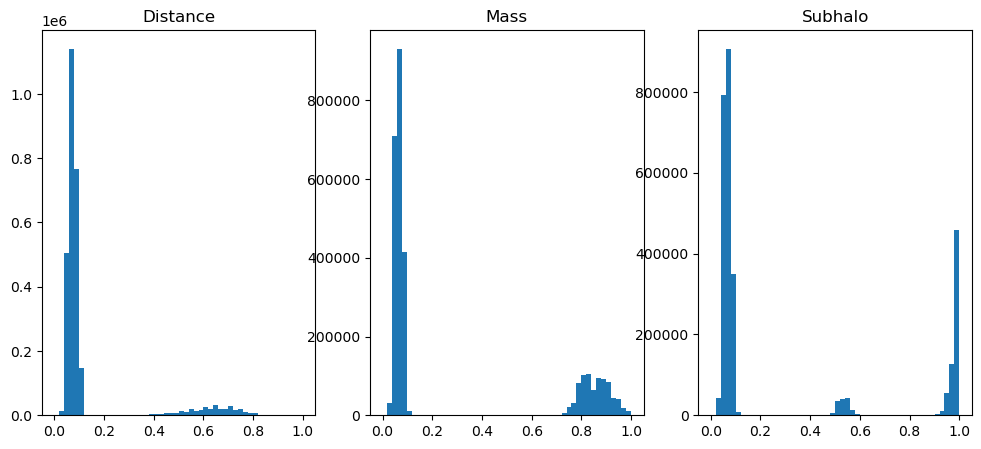

In [74]:
dist = nearest[:, 0]
mass = nearest[:, 1]
subh = nearest[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [75]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.15
upper_threshold = 0.6985
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.15
upper_threshold = 0.47
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.61
upper_threshold = 0.88
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.25: 0.01%

mass:
Percentage of values between 0.15 and 0.6985: 0.00%

subh:
Percentage of values between 0.15 and 0.47: 0.00%

Percentage of values between 0.61 and 0.88: 0.00%



In [98]:
nearest = torch.load("../testing/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])
nearest = transform_diffusion_image(nearest, d_thresh = 0.25, m_tresh = 0.6985, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = nearest[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.00%



In [22]:

nearest_con, nearest_incon = check_consistency(nearest)



Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 2.06%
inconsistency due to last descendant dont exist 100.00%

Number of images with two or more inconsistencies = 10000, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 100.00% have gap between branches inconsistency
Of all images, 2.06% have gap within branch inconsistency
Of all images, 100.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 255272
perc of occurences where mass is not preserved = 32.53% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 169813
perc of occurences where mass is not preserved = 21.64% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 16341
perc of occurences where mass is not preserved = 2.08% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1008
perc of occurences where mass is not preserved = 0.13% vs. 0.32% in training data







DISTANCE:
total distance progentors = 327467 
number of occurences where distance increase (not preserved) = 154207
perc of occurences where mass increase (not preserved) = 47.09% vs. 49.67% in training data


total branches where the last halo distance to m

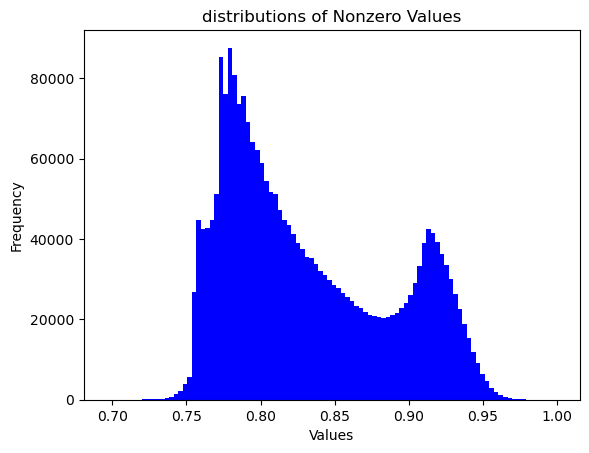

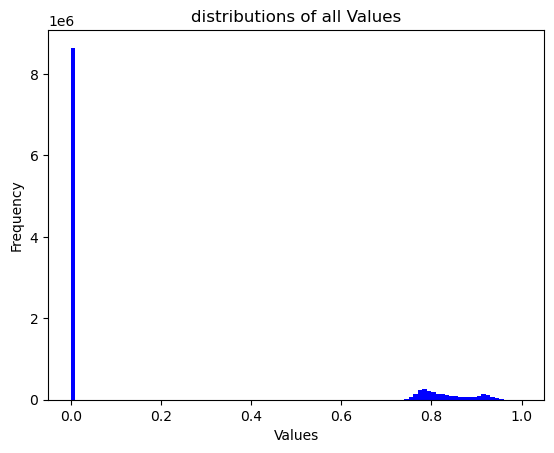

number of nonzero values = 2475374
Generated images:


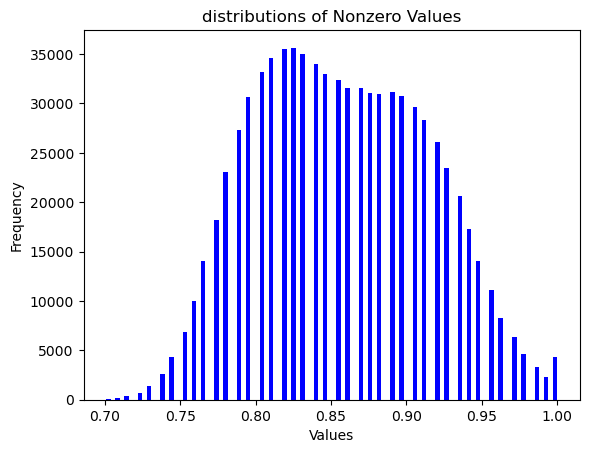

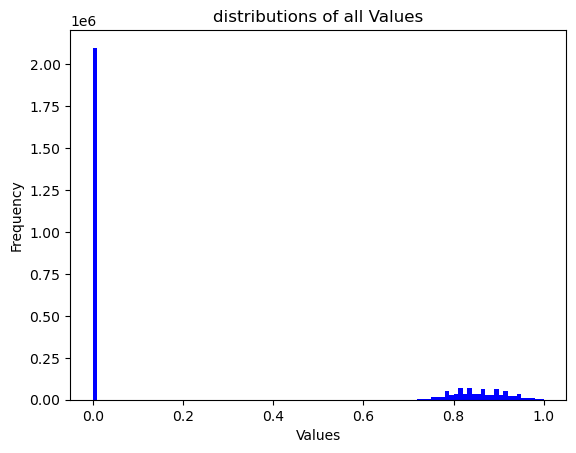

number of nonzero values = 799938


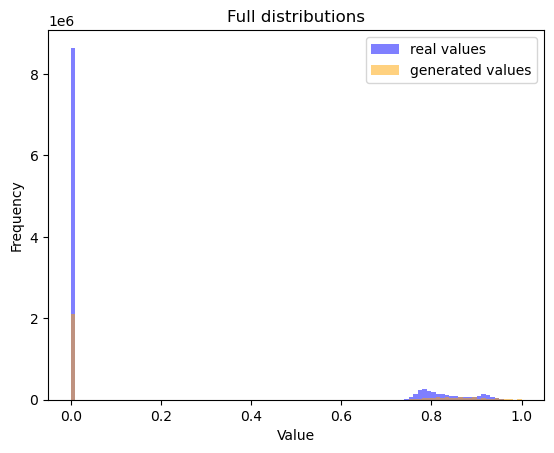

Full distribution:
KS Statistic: 0.09602608741003449
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0960 > 0.0009


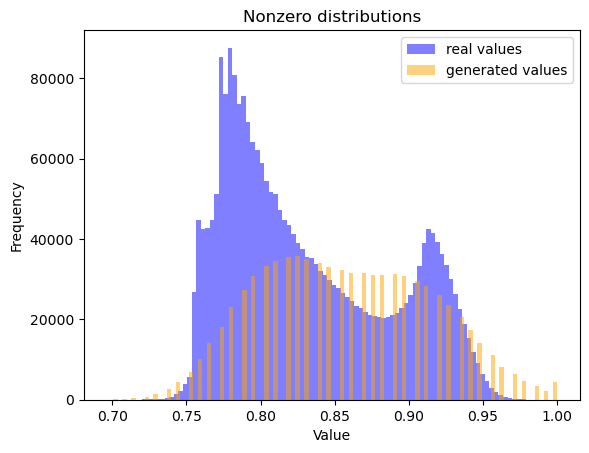

Nonzero distribution:
KS Statistic: 0.24556775996828784
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0017:
The distributions are significantly different (reject H0), KS statistic 0.2456 > 0.0017


(0.09602608741003449, 0.24556775996828784)

In [24]:
variable_consistancy_check(nearest, False)
avg_branch = check_branch_length(nearest)
ks_test(original, nearest, dim = 1)

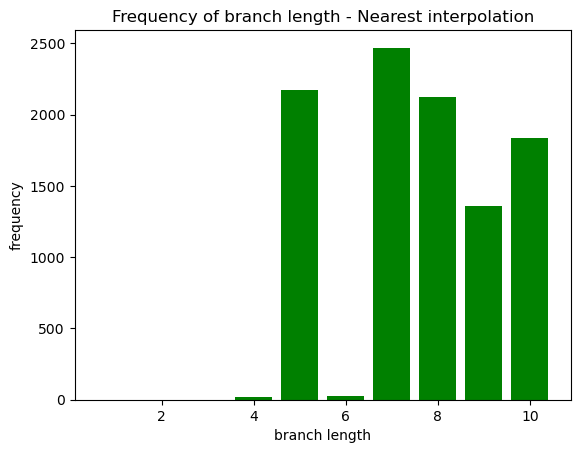

In [25]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 18, 2173, 23, 2469, 2123, 1358, 1836]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - Nearest interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = NEAREST EXACT

In [26]:
nearest_exact = torch.load("../testing/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST_EXACT
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])

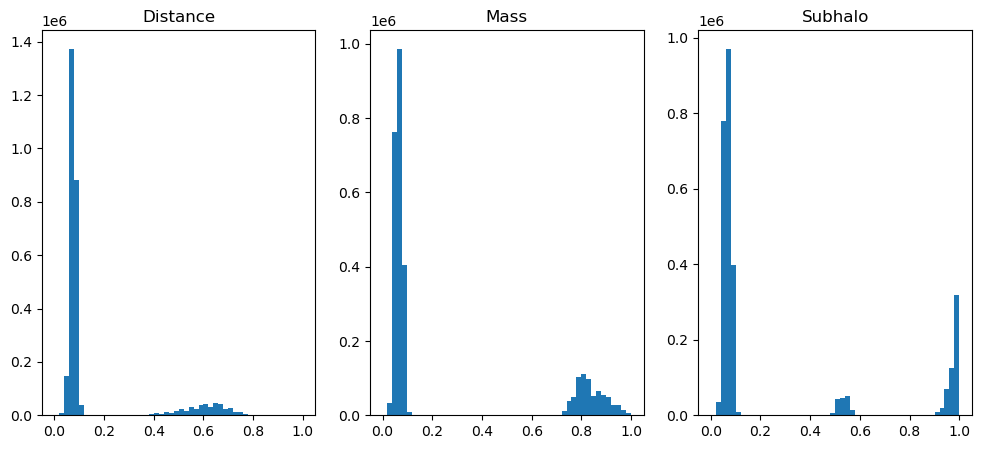

In [27]:
dist = nearest_exact[:, 0]
mass = nearest_exact[:, 1]
subh = nearest_exact[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [31]:
# dist
print("dist:")
lower_threshold = 0.13
upper_threshold = 0.23
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.12
upper_threshold = 0.6985
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.12
upper_threshold = 0.47
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.63
upper_threshold = 0.89
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.13 and 0.23: 0.00%

mass:
Percentage of values between 0.12 and 0.6985: 0.00%

subh:
Percentage of values between 0.12 and 0.47: 0.00%

Percentage of values between 0.63 and 0.89: 0.00%



In [32]:
nearest_exact = torch.load("../testing/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST_EXACT
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])
nearest_exact = transform_diffusion_image(nearest_exact, d_thresh = 0.2, m_tresh = 0.6985, s_low = 0.35, s_high = 0.77)

original_min = 0.6985
mass = nearest_exact[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.00%



In [33]:

nearest_exact_con, nearest_exact_incon = check_consistency(nearest_exact)




Percentage of consistant images = 88.83%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  72.78%
inconsistency due to zgap in branch 30.89%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 41, which is  3.67%
That corresponds to 0.41% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 8.13% have gap between branches inconsistency
Of all images, 3.45% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 204318
perc of occurences where mass is not preserved = 33.58% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 138073
perc of occurences where mass is not preserved = 22.69% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 15527
perc of occurences where mass is not preserved = 2.55% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1127
perc of occurences where mass is not preserved = 0.19% vs. 0.32% in training data







DISTANCE:
total distance progentors = 395854 
number of occurences where distance increase (not preserved) = 174763
perc of occurences where mass increase (not preserved) = 44.15% vs. 49.67% in training data


total branches where the last halo distance to m

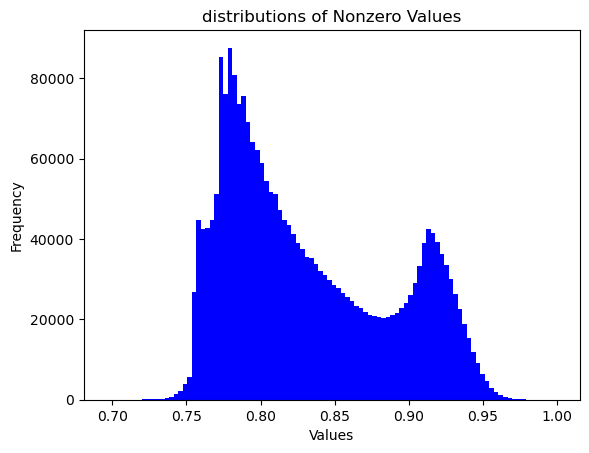

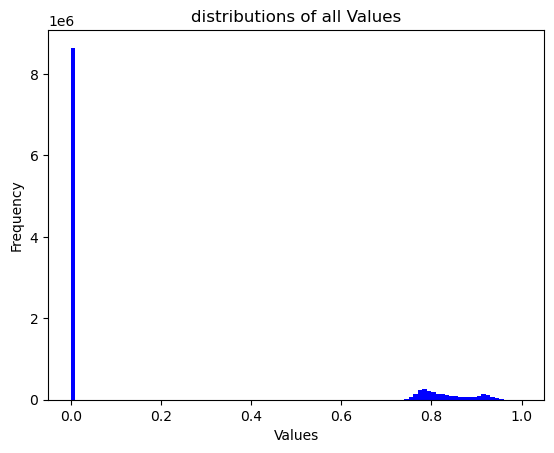

number of nonzero values = 2475374
Generated images:


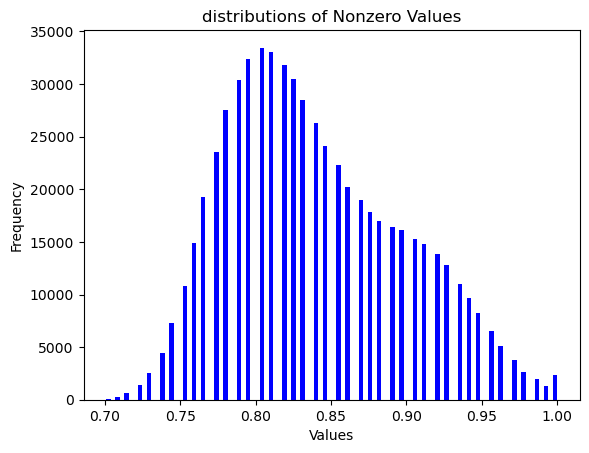

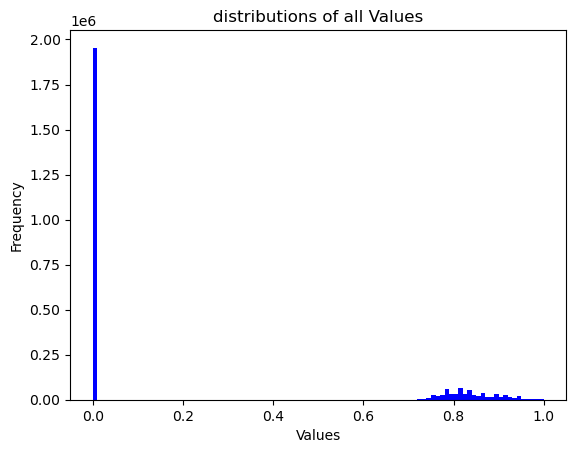

number of nonzero values = 621739


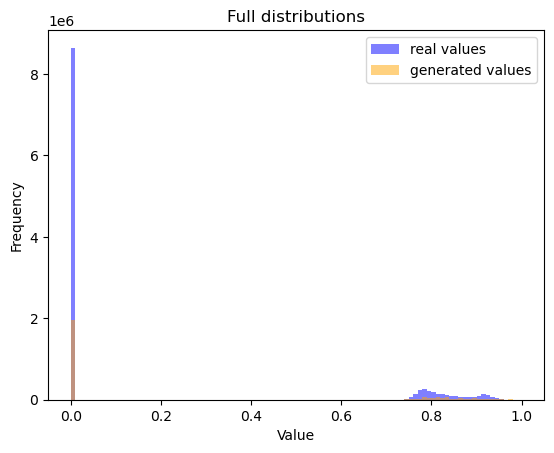

Full distribution:
KS Statistic: 0.041534485473751714
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0415 > 0.0009


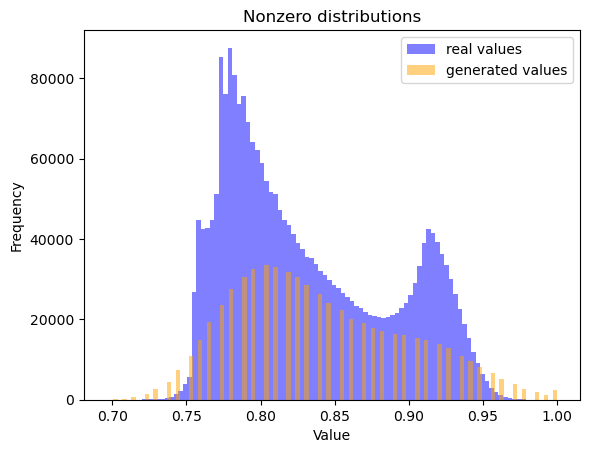

Nonzero distribution:
KS Statistic: 0.12612977633485378
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1261 > 0.0019


(0.041534485473751714, 0.12612977633485378)

In [34]:
variable_consistancy_check(nearest_exact_con, False)
avg_branch = check_branch_length(nearest_exact_con)
ks_test(original, nearest_exact_con, dim = 1)

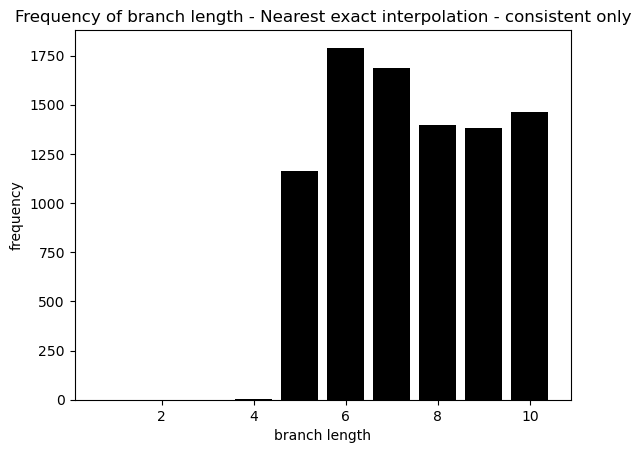

In [36]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 4, 1161, 1790, 1688, 1397, 1381, 1462]

plt.bar(num_branches, length, color = "black")

# Add title and labels
plt.title('Frequency of branch length - Nearest exact interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = BILINEAR


In [37]:
bilinear = torch.load("../testing/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


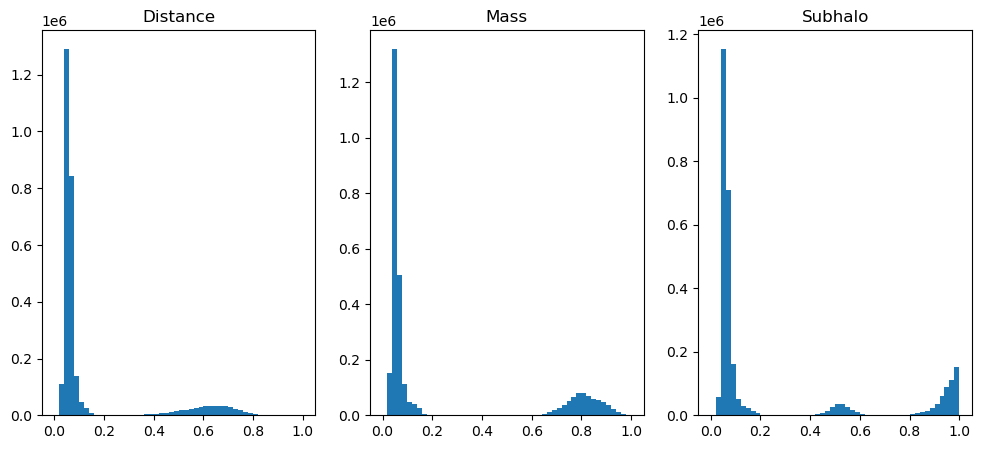

In [38]:
bilinear = torch.load("../testing/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])

dist = bilinear[:, 0]
mass = bilinear[:, 1]
subh = bilinear[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [62]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.54
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.39
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.73
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.25: 0.01%

mass:
Percentage of values between 0.2 and 0.54: 0.00%

subh:
Percentage of values between 0.25 and 0.39: 0.00%

Percentage of values between 0.7 and 0.73: 0.00%



In [63]:
bilinear = torch.load("../testing/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.25, m_tresh = 0.53, s_low = 0.3, s_high = 0.72)

original_min = 0.6985
mass = bilinear[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 1.35%



In [64]:

bilinear_con, bilinear_incon = check_consistency(bilinear)




Percentage of consistant images = 93.69%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  59.11%
inconsistency due to zgap in branch 43.11%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 14, which is  2.22%
That corresponds to 0.14% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.73% have gap between branches inconsistency
Of all images, 2.72% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 250862
perc of occurences where mass is not preserved = 39.57% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 156818
perc of occurences where mass is not preserved = 24.74% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 38549
perc of occurences where mass is not preserved = 6.08% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 14939
perc of occurences where mass is not preserved = 2.36% vs. 0.32% in training data







DISTANCE:
total distance progentors = 408214 
number of occurences where distance increase (not preserved) = 208519
perc of occurences where mass increase (not preserved) = 51.08% vs. 49.67% in training data


total branches where the last halo distance to 

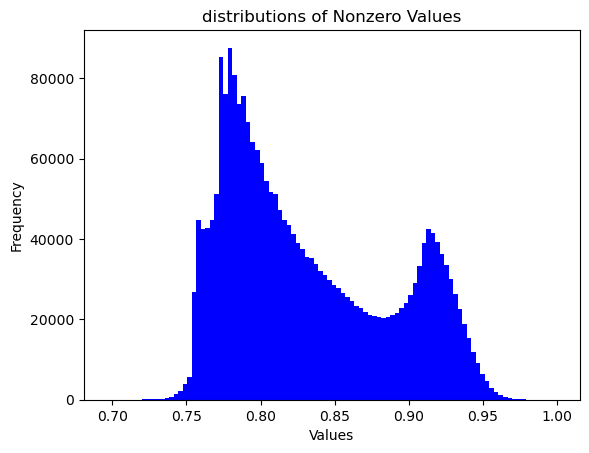

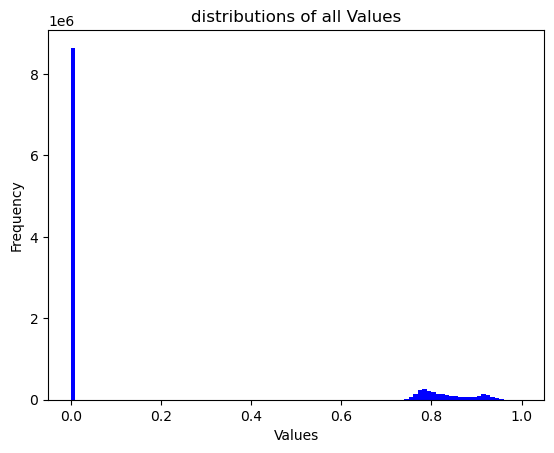

number of nonzero values = 2475374
Generated images:


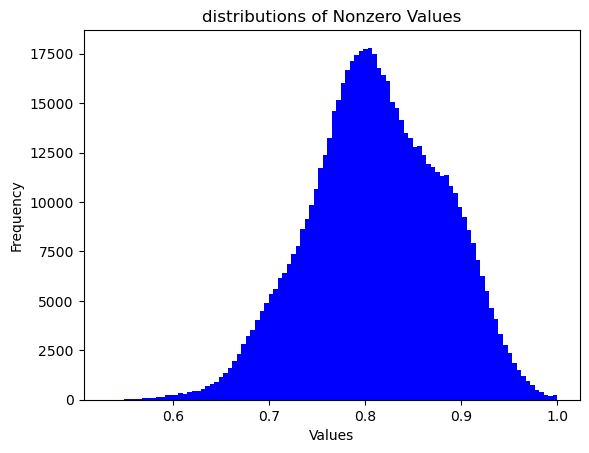

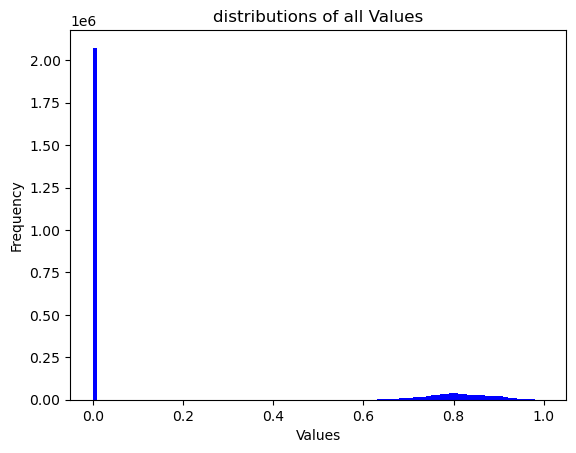

number of nonzero values = 642877


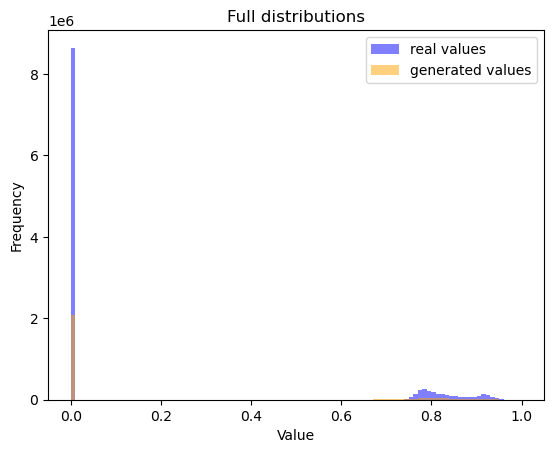

Full distribution:
KS Statistic: 0.032383058288016575
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0324 > 0.0009


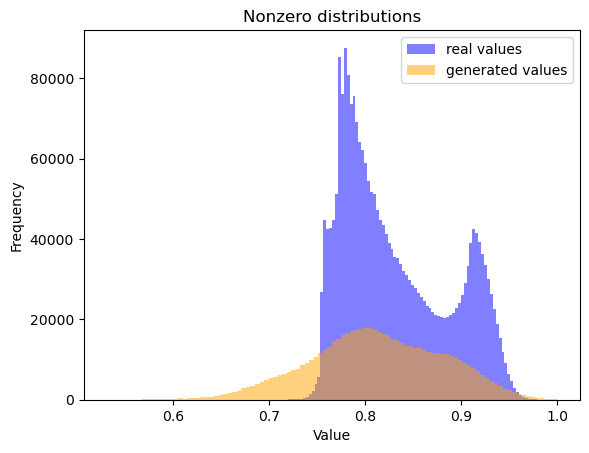

Nonzero distribution:
KS Statistic: 0.19570283111101772
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1957 > 0.0019


(0.032383058288016575, 0.19570283111101772)

In [65]:
variable_consistancy_check(bilinear_con, False)
avg_branch = check_branch_length(bilinear_con)
ks_test(original, bilinear_con, dim = 1)

Real images:


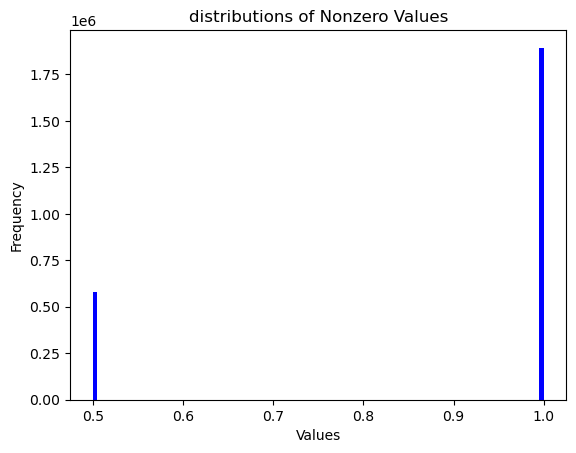

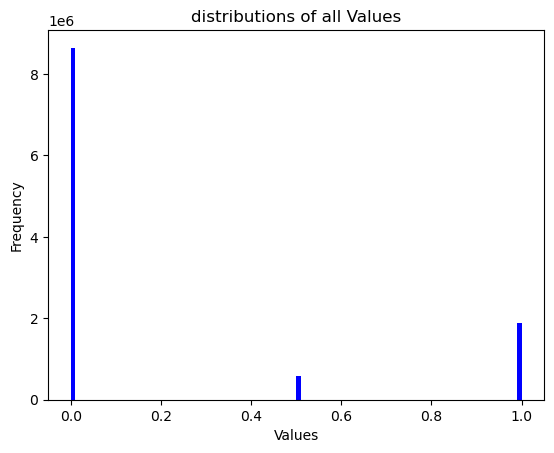

number of nonzero values = 2475374
Generated images:


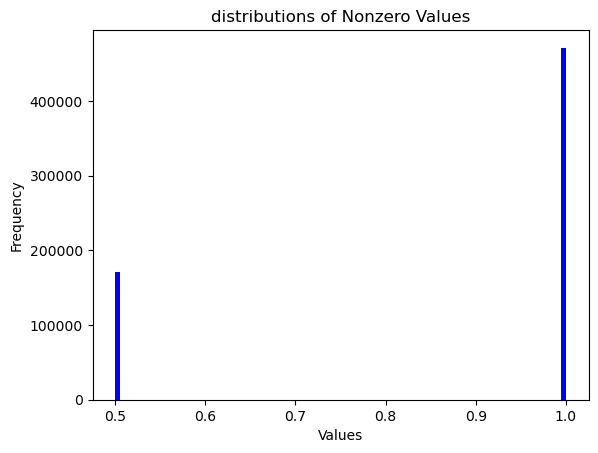

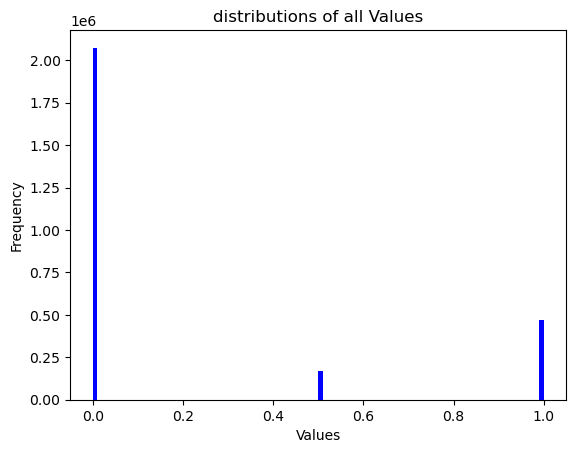

number of nonzero values = 642878


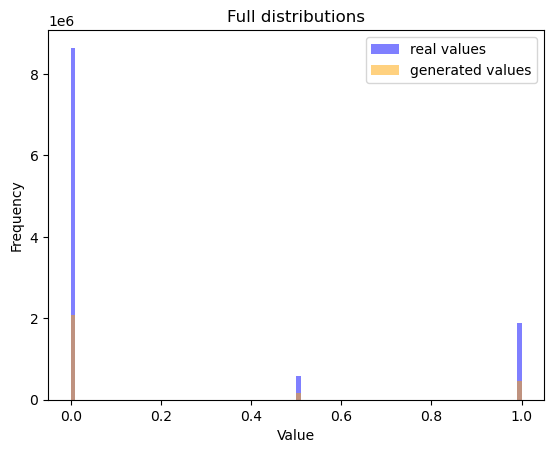

Full distribution:
KS Statistic: 0.014025145383595783
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0140 > 0.0009


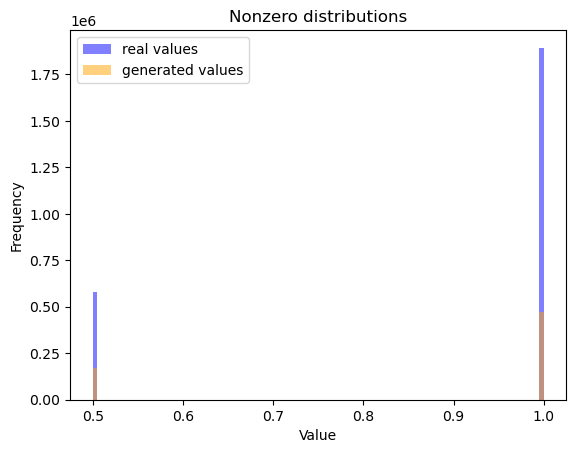

Nonzero distribution:
KS Statistic: 0.031941146630103
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.0319 > 0.0019


(0.014025145383595783, 0.031941146630103)

In [106]:
ks_test(original, bilinear_con, dim = 2)

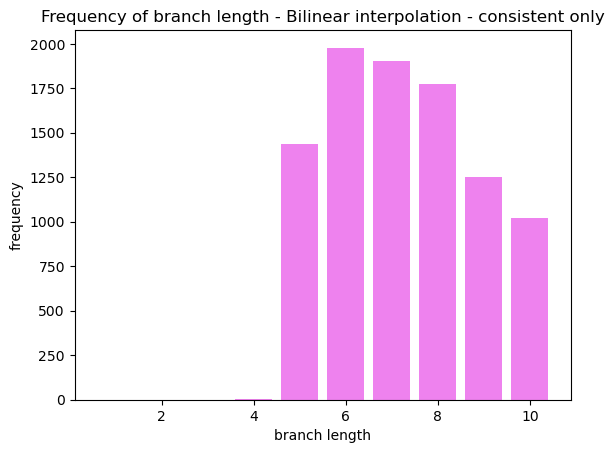

In [67]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 3, 1439, 1978, 1903, 1773, 1251, 1023]

plt.bar(num_branches, length, color = "violet")

# Add title and labels
plt.title('Frequency of branch length - Bilinear interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = BICUBIC


In [76]:
bicubic = torch.load("../testing/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BICUBIC
transform = transforms.Resize((29, 10), interpolation = interpolation)
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])

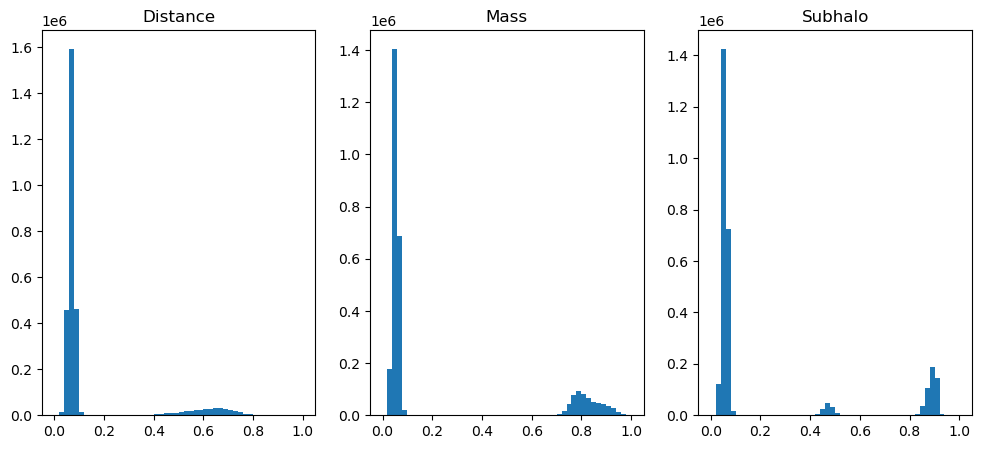

In [77]:
dist = bicubic[:, 0]
mass = bicubic[:, 1]
subh = bicubic[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [85]:
# dist

print("dist:")
lower_threshold = 0.13
upper_threshold = 0.23
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.1
upper_threshold = 0.67
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.1
upper_threshold = 0.42
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.55
upper_threshold = 0.81
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.13 and 0.23: 0.00%

mass:
Percentage of values between 0.1 and 0.67: 0.00%

subh:
Percentage of values between 0.1 and 0.42: 0.00%

Percentage of values between 0.55 and 0.81: 0.00%



In [90]:
bicubic = torch.load("../testing/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BICUBIC
transform = transforms.Resize((29, 10), interpolation = interpolation)
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])
bicubic = transform_diffusion_image(bicubic, d_thresh = 0.18, m_tresh = 0.6, s_low = 0.3, s_high = 0.72)

original_min = 0.6958
mass = bicubic[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")


mass:
Percentage of values below 0.6958: 0.01%



In [92]:

bicubic_con, bicubic_incon = check_consistency(bicubic)



Percentage of consistant images = 95.42%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  72.27%
inconsistency due to zgap in branch 28.60%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 4, which is  0.87%
That corresponds to 0.04% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.31% have gap between branches inconsistency
Of all images, 1.31% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 214852
perc of occurences where mass is not preserved = 37.58% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 131135
perc of occurences where mass is not preserved = 22.94% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 10775
perc of occurences where mass is not preserved = 1.88% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 693
perc of occurences where mass is not preserved = 0.12% vs. 0.32% in training data







DISTANCE:
total distance progentors = 344002 
number of occurences where distance increase (not preserved) = 176638
perc of occurences where mass increase (not preserved) = 51.35% vs. 49.67% in training data


total branches where the last halo distance to ma

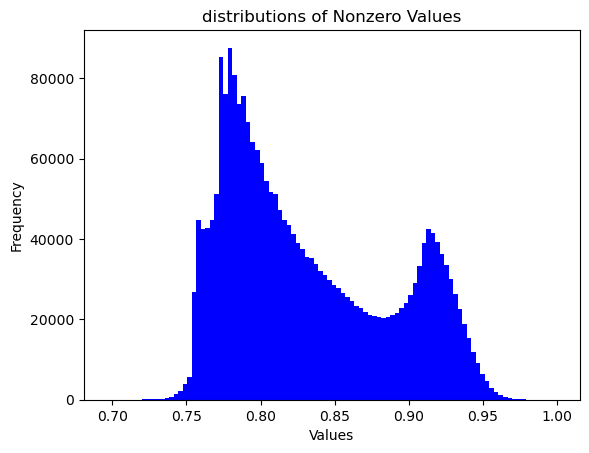

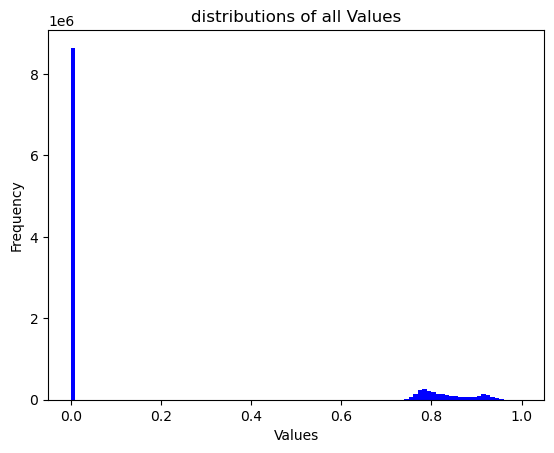

number of nonzero values = 2475374
Generated images:


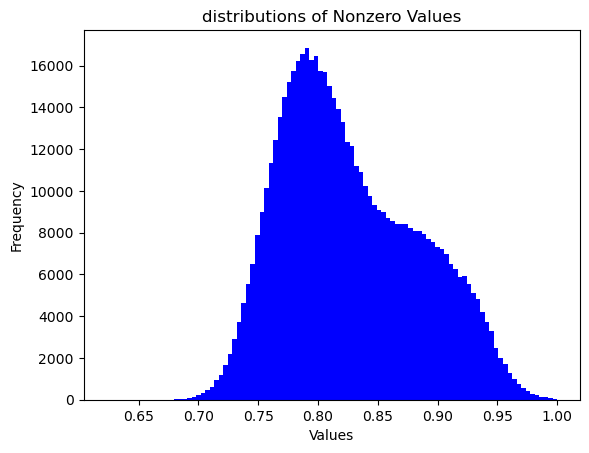

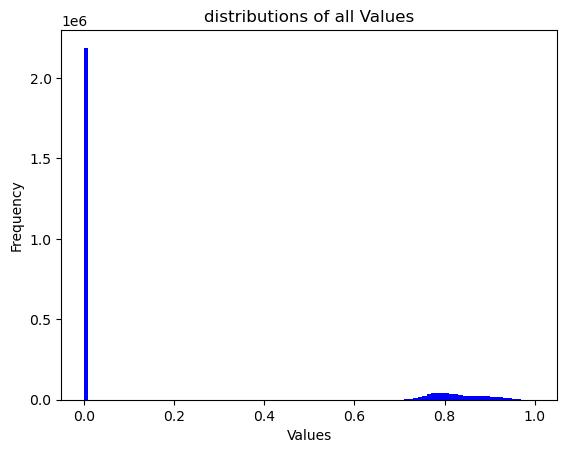

number of nonzero values = 579833


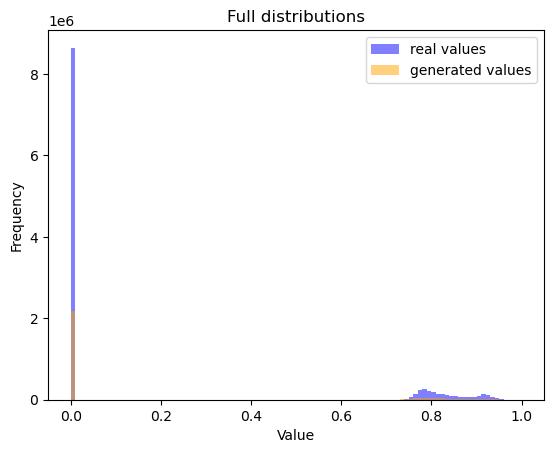

Full distribution:
KS Statistic: 0.02900377208078042
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0290 > 0.0009


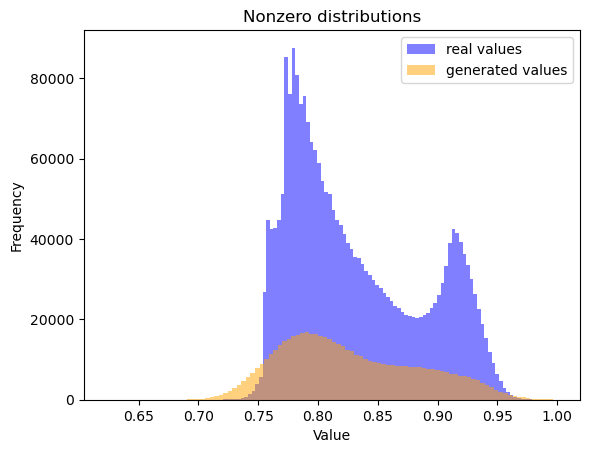

Nonzero distribution:
KS Statistic: 0.07660148007876706
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.0766 > 0.0020


(0.02900377208078042, 0.07660148007876706)

In [93]:
variable_consistancy_check(bicubic_con, False)
avg_branch = check_branch_length(bicubic_con)
ks_test(original, bicubic_con, dim = 1)

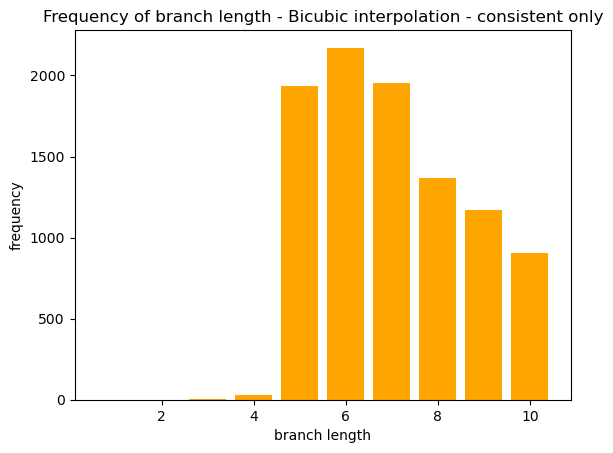

In [95]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 5, 29, 1936, 2171, 1955, 1365, 1172, 906]

plt.bar(num_branches, length, color = "orange")

# Add title and labels
plt.title('Frequency of branch length - Bicubic interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()